In [1]:
# import contractions library.
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 9.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
# %load_ext nb_black 

# library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")


# import Regex, string and unicodedata.
import re, string, unicodedata                          

import contractions                                     

# import BeautifulSoup.
from bs4 import BeautifulSoup                           

# import Natural Language Tool-Kit.
import nltk                                            

# download Stopwords.
nltk.download('stopwords')                              
nltk.download('punkt')
nltk.download('wordnet')

# import stopwords.
from nltk.corpus import stopwords                       

# import Tokenizer.
from nltk.tokenize import word_tokenize, sent_tokenize  

# library to split data
from sklearn.model_selection import train_test_split, StratifiedKFold

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# import wordcloud
import wordcloud
from wordcloud import STOPWORDS
from wordcloud import WordCloud

# remove the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# set the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to get diferent metric scores
from sklearn.metrics import (
    recall_score,
    accuracy_score,
    confusion_matrix,classification_report,
    f1_score,
    precision_score,
    precision_recall_fscore_support
)

# import vectorizers
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# import rfc and cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# import word prepocessors
from nltk.tokenize import word_tokenize 
from nltk.stem import LancasterStemmer, WordNetLemmatizer

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
df = pd.read_csv(r'/kaggle/input/u-s-airline-tweets/Tweets.csv')

In [4]:
df.head()

,Tweet_id,Airline_Sentiment,airline_sentiment_confidence,Negativereason,Negativereason_Confidence,Airline,Airline_Sentiment_Gold,Name,Negativereason_gold,Retweet_Count,Text,Tweet_Coord,Tweet_Created,Tweet_Location,User_Timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24-02-2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24-02-2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24-02-2015 11:14,NaN,Pacific Time (US & Canada)


In [5]:
texts = [[word.lower() for word in text.split()] for text in df]

In [6]:
df.head()

,Tweet_id,Airline_Sentiment,airline_sentiment_confidence,Negativereason,Negativereason_Confidence,Airline,Airline_Sentiment_Gold,Name,Negativereason_gold,Retweet_Count,Text,Tweet_Coord,Tweet_Created,Tweet_Location,User_Timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24-02-2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24-02-2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24-02-2015 11:14,NaN,Pacific Time (US & Canada)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Tweet_id                      14640 non-null  float64
 1   Airline_Sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   Negativereason                9178 non-null   object 
 4   Negativereason_Confidence     10522 non-null  float64
 5   Airline                       14640 non-null  object 
 6   Airline_Sentiment_Gold        40 non-null     object 
 7   Name                          14640 non-null  object 
 8   Negativereason_gold           32 non-null     object 
 9   Retweet_Count                 14640 non-null  int64  
 10  Text                          14640 non-null  object 
 11  Tweet_Coord                   1019 non-null   object 
 12  Tweet_Created                 14640 non-null  object 
 13  T

# **Observations:**

There are 15 columns in the dataset.
Half of the columns have null values. Considering both dependent and independent variables not having any null values, we will not do any null value processing.
Most columns in the dataset are of object type.
airline_sentiment is our dependent / target variable.
text column is our independent variable that we will use for analysis.
All other columns will be dropped at a later stage.

In [8]:
df.isnull().sum()

Tweet_id                            0
Airline_Sentiment                   0
airline_sentiment_confidence        0
Negativereason                   5462
Negativereason_Confidence        4118
Airline                             0
Airline_Sentiment_Gold          14600
Name                                0
Negativereason_gold             14608
Retweet_Count                       0
Text                                0
Tweet_Coord                     13621
Tweet_Created                       0
Tweet_Location                   4733
User_Timezone                    4820
dtype: int64

In [9]:
df.isnull().sum() / len(df) * 100

Tweet_id                         0.000000
Airline_Sentiment                0.000000
airline_sentiment_confidence     0.000000
Negativereason                  37.308743
Negativereason_Confidence       28.128415
Airline                          0.000000
Airline_Sentiment_Gold          99.726776
Name                             0.000000
Negativereason_gold             99.781421
Retweet_Count                    0.000000
Text                             0.000000
Tweet_Coord                     93.039617
Tweet_Created                    0.000000
Tweet_Location                  32.329235
User_Timezone                   32.923497
dtype: float64

<Axes: >

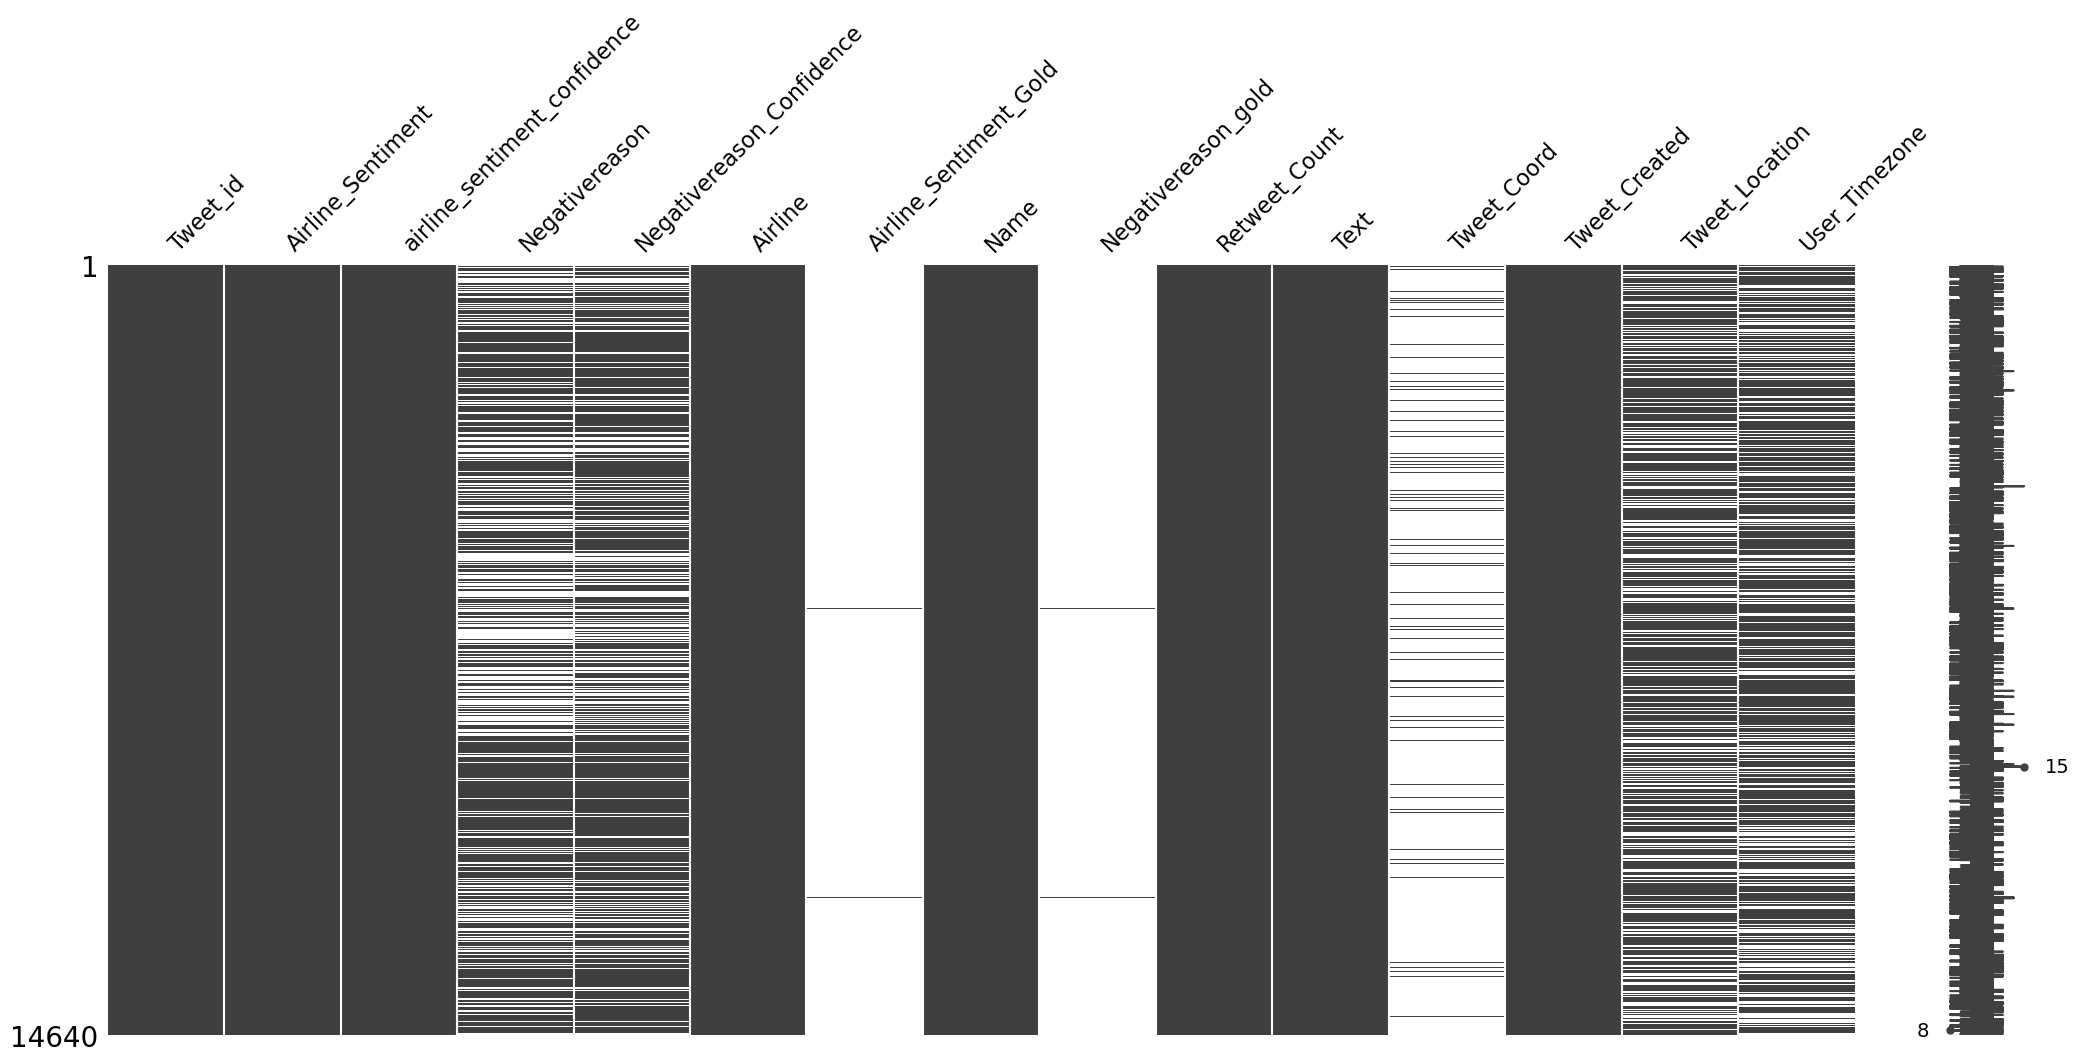

In [10]:
msno.matrix(df)

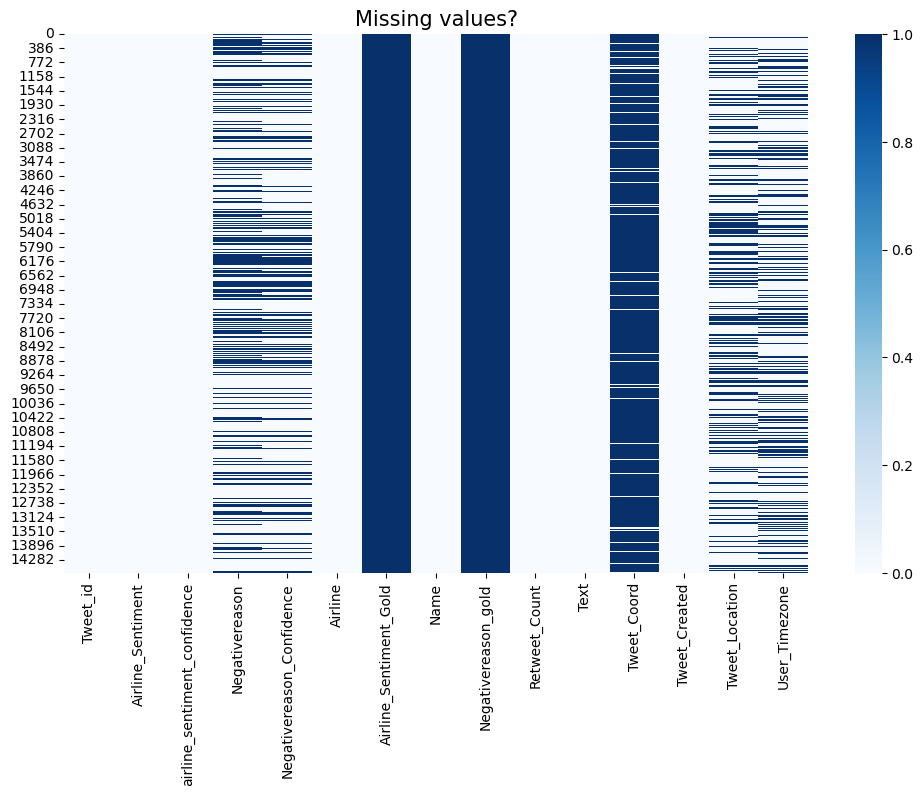

In [11]:
plt.figure(figsize=(12,7))
sns.heatmap(df.isnull(), cmap = "Blues")                       #Visualization of missing value using heatmap
plt.title("Missing values?", fontsize = 15)
plt.show()

**Interestingly, the only non-null values of the _gold columns seems to be the same entries for the most part. Meanwhile, there is some but not total overlap between location and timezone in terms of missing values.**

In [12]:
print("Percentage null or na values in df")
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

Percentage null or na values in df


Tweet_id                         0.00
Airline_Sentiment                0.00
airline_sentiment_confidence     0.00
Negativereason                  37.31
Negativereason_Confidence       28.13
Airline                          0.00
Airline_Sentiment_Gold          99.73
Name                             0.00
Negativereason_gold             99.78
Retweet_Count                    0.00
Text                             0.00
Tweet_Coord                     93.04
Tweet_Created                    0.00
Tweet_Location                  32.33
User_Timezone                   32.92
dtype: float64

**airline_sentiment_gold, negativereason_gold** have more than 99% missing data And **tweet_coord** have nearly 93% missing data. It will be better to delete these columns as they will not provide any constructive information

In [13]:
del df["Tweet_Coord"]
del df["Airline_Sentiment_Gold"]
del df["Negativereason_gold"]

In [14]:
df.head()

,Tweet_id,Airline_Sentiment,airline_sentiment_confidence,Negativereason,Negativereason_Confidence,Airline,Name,Retweet_Count,Text,Tweet_Created,Tweet_Location,User_Timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,24-02-2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,24-02-2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,24-02-2015 11:14,NaN,Pacific Time (US & Canada)


In [15]:
freq = df.groupby("Negativereason").size()

**we can't fill it will affect in bad way for example we have positive reviwe and we fill the values with mode that means with Customer Service Issue it is missmatch and can be affect on train model so we keep the data as it is.**

In [16]:
# Checking duplicates
df.duplicated().sum()

39

In [17]:
# Dropping duplicates
df.drop_duplicates(inplace = True)

In [18]:
df.duplicated().sum()

0

In [19]:
df.sample(n = 10)

,Tweet_id,Airline_Sentiment,airline_sentiment_confidence,Negativereason,Negativereason_Confidence,Airline,Name,Retweet_Count,Text,Tweet_Created,Tweet_Location,User_Timezone
14291,5.696420e+17,negative,1.0000,Customer Service Issue,1.0000,American,Cameratown,0,@AmericanAir the fact that that rule makes it ...,22-02-2015 15:35,"Boston, MA",Eastern Time (US & Canada)
4859,5.696760e+17,positive,0.6536,NaN,NaN,Southwest,happygirlvicki,0,@SouthwestAir beautiful view flying into San J...,22-02-2015 17:53,"Omaha, Nebraska",Central Time (US & Canada)
14252,5.696460e+17,negative,1.0000,Cancelled Flight,0.6925,American,McKennon,0,@AmericanAir Just learned my flight is Cancell...,22-02-2015 15:52,NaN,Atlantic Time (Canada)
11072,5.685380e+17,neutral,0.6771,NaN,0.0000,US Airways,Andreas_Hirsch,0,@USAirways Do you have a phone Nbr for Refund ...,19-02-2015 14:30,GERMANY,Greenland
5356,5.691700e+17,negative,1.0000,Customer Service Issue,1.0000,Southwest,SherzodGulamov,0,@SouthwestAir can't speak with customer servic...,21-02-2015 08:20,"Washington DC, New York",NaN
6743,5.676550e+17,positive,1.0000,NaN,NaN,Southwest,rjp1208,0,@SouthwestAir nice work on the update!,17-02-2015 04:03,NaN,Pacific Time (US & Canada)
13353,5.698840e+17,negative,1.0000,Can't Tell,1.0000,American,_mhertz,0,@AmericanAir you're almost as bad as @united,23-02-2015 07:37,NaN,Pacific Time (US & Canada)
13096,5.699410e+17,neutral,1.0000,NaN,NaN,American,MikeBarr63,0,@AmericanAir due to road conditions,23-02-2015 11:24,"Allen, TX",NaN
10899,5.687920e+17,negative,1.0000,Late Flight,0.6753,US Airways,FrancisDeana,0,@USAirways the flights weren't from this morni...,20-02-2015 07:18,NaN,NaN
1124,5.699210e+17,negative,0.6790,Can't Tell,0.6790,United,_mhertz,1,@united that's not even an apology,23-02-2015 10:03,NaN,Pacific Time (US & Canada)


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Tweet_id,14601.0,5.692158e+17,7.783346e+14,5.675880e+17,5.685580e+17,5.694720e+17,5.698900e+17,5.703110e+17
airline_sentiment_confidence,14601.0,8.999022e-01,1.629654e-01,3.350000e-01,6.923000e-01,1.000000e+00,1.000000e+00,1.000000e+00
Negativereason_Confidence,10501.0,6.375749e-01,3.303735e-01,0.000000e+00,3.605000e-01,6.705000e-01,1.000000e+00,1.000000e+00
Retweet_Count,14601.0,8.280255e-02,7.467231e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01


## EDA

In [21]:
df.nunique()

Tweet_id                         2429
Airline_Sentiment                   3
airline_sentiment_confidence     1023
Negativereason                     10
Negativereason_Confidence        1410
Airline                             6
Name                             7701
Retweet_Count                      18
Text                            14427
Tweet_Created                    6804
Tweet_Location                   3022
User_Timezone                      85
dtype: int64

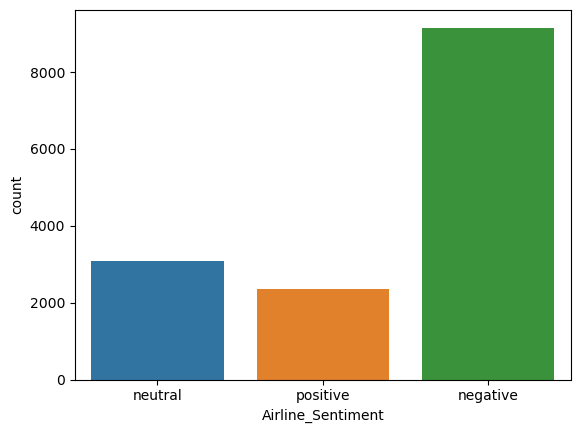

In [22]:
ax = sns.countplot(x = "Airline_Sentiment", data = df)

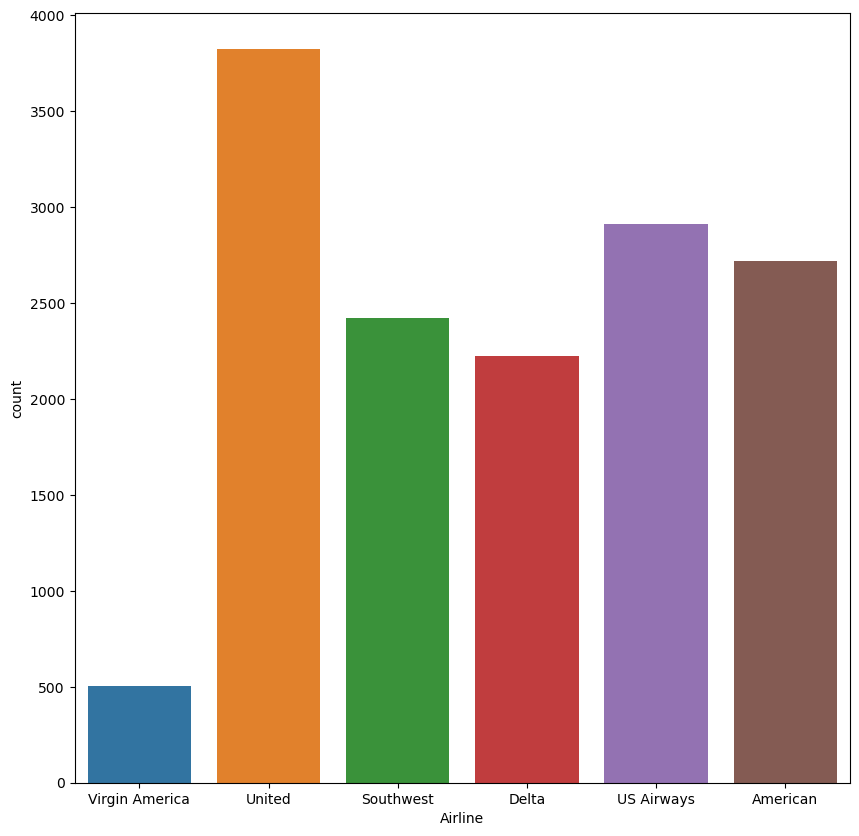

In [23]:
plt.figure(figsize = (10, 10))
ax = sns.countplot(x = "Airline", data = df)

## **Stacked bar chart to show the distribution of reviews per company**

In [24]:
import plotly.graph_objects as go
crosstab_sentiments=pd.crosstab(df.Airline, df.Airline_Sentiment)
companies=list(crosstab_sentiments.index)

fig = go.Figure(data=[
    go.Bar(name=col_name, x=companies, y=list(crosstab_sentiments[col_name]))
for col_name in list(crosstab_sentiments.columns)])
# Change the bar mode
fig.update_layout(barmode='stack',
                  title='Sentiment distribution per company',
                  yaxis=dict(title='Sentiment distribution'),
                 xaxis=dict(title='Companies'))
fig.show()

## **Stacked bar chart to show negative reasons distributions per company**

In [25]:
crosstab_neg_reasons = pd.crosstab(df["Airline"], df["Negativereason"])
companies = list(crosstab_neg_reasons.index)

fig = go.Figure(data = [
    go.Bar(name = col_name, x = companies, y = list(crosstab_neg_reasons[col_name]))
for col_name in list(crosstab_neg_reasons.columns)])

fig.update_layout(barmode = "stack",
                 title = "Negative Reasons Distribution per Company",
                 yaxis = dict(title = "Negative reasons Distribution"),
                 xaxis = dict(title = "Companies"))
fig.show()

## **Pie plot to check the overall distribution for negative reasons**

In [26]:
labels = list(crosstab_neg_reasons.columns)
values = [crosstab_neg_reasons[col_name].sum() for col_name in labels]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title='Overall distribution for negative reasons')
fig.show()

In [27]:
df.drop(df.loc[df["Airline_Sentiment"] == "neutral"].index, inplace = True)

## Vectorization Process

In [28]:
data = df[
    ["Airline_Sentiment", "Text"]
]
data.head()

,Airline_Sentiment,Text
1,positive,@VirginAmerica plus you've added commercials t...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
5,negative,@VirginAmerica seriously would pay $30 a fligh...
6,positive,"@VirginAmerica yes, nearly every time I fly VX..."


In [29]:
X = df["Text"]
y = df["Airline_Sentiment"]

In [30]:
X

1        @VirginAmerica plus you've added commercials t...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
5        @VirginAmerica seriously would pay $30 a fligh...
6        @VirginAmerica yes, nearly every time I fly VX...
                               ...                        
14633    @AmericanAir my flight was Cancelled Flightled...
14634           @AmericanAir right on cue with the delays👌
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14638    @AmericanAir you have my money, you change my ...
Name: Text, Length: 11510, dtype: object

In [31]:
y

1        positive
3        negative
4        negative
5        negative
6        positive
           ...   
14633    negative
14634    negative
14635    positive
14636    negative
14638    negative
Name: Airline_Sentiment, Length: 11510, dtype: object

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [33]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9208,) (2302,) (9208,) (2302,)


In [34]:
tfidf = TfidfVectorizer(stop_words="english")

In [35]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [36]:
print(tfidf.get_feature_names_out())

['00' '000' '000ft' ... 'zv6cfpohl5' 'zvfmxnuelj' 'zzps5ywve2']


In [37]:
print(tfidf.vocabulary_)

{'jetblue': 5633, 'did': 3478, 'idea': 5246, 'offered': 7007, 'pay': 7303, 'tix': 9682, 'airport': 1441, 'bc': 1996, 'told': 9717, 'reservation': 8178, 'didn': 3479, '2275': 394, 'pp': 7562, 'united': 10134, 'guys': 4880, 'suck': 9273, 'respond': 8195, 'friend': 4543, 'lisapal': 6047, 'directly': 3509, 'southwestair': 8993, 'prove': 7740, 'cuz': 3226, 'southwest': 8992, 'people': 7334, 'don': 3654, 'know': 5828, 'schedule': 8525, 'ticket': 9644, 'issued': 5545, 'whilst': 10610, 'delivering': 3377, 'customers': 3210, 'usairways': 10266, 'pilot': 7421, 'flight': 4354, '729': 997, 'departure': 3405, 'amp': 1545, 'broken': 2303, 'computer': 2933, 'time': 9662, 'flying': 4428, 'alwayslate': 1510, 'americanair': 1528, 'point': 7507, 'pic': 7404, 'reps': 8152, 'struggle': 9231, 'merger': 6438, 'imagine': 5284, 'public': 7765, 'http': 5190, 'hqdb5iruvg': 5181, 'thanks': 9552, 'dm': 3619, 'rescheduling': 8171, 'unfortunately': 10121, 'operations': 7076, 'process': 7682, 'lax': 5921, 'chaos': 26

In [38]:
data[data["Airline_Sentiment"] == "negative"]["Text"]

3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
5        @VirginAmerica seriously would pay $30 a fligh...
15           @VirginAmerica SFO-PDX schedule is still MIA.
17       @VirginAmerica  I flew from NYC to SFO last we...
                               ...                        
14631    @AmericanAir thx for nothing on getting us out...
14633    @AmericanAir my flight was Cancelled Flightled...
14634           @AmericanAir right on cue with the delays👌
14636    @AmericanAir leaving over 20 minutes Late Flig...
14638    @AmericanAir you have my money, you change my ...
Name: Text, Length: 9157, dtype: object

In [39]:
count_vect = CountVectorizer(stop_words="english")
neg_matrix = count_vect.fit_transform(data[data["Airline_Sentiment"]=="negative"]["Text"])
freqs = zip(count_vect.get_feature_names_out(), neg_matrix.sum(axis=0).tolist()[0])
# Sort from largest to smallest
print(sorted(freqs, key=lambda x: -x[1])[:100])

[('flight', 2937), ('united', 2899), ('usairways', 2375), ('americanair', 2089), ('southwestair', 1214), ('jetblue', 1051), ('cancelled', 921), ('service', 746), ('hours', 646), ('just', 622), ('help', 618), ('hold', 611), ('customer', 609), ('time', 596), ('plane', 530), ('delayed', 505), ('amp', 503), ('hour', 452), ('flightled', 445), ('http', 436), ('flights', 419), ('bag', 415), ('gate', 410), ('ve', 398), ('don', 388), ('late', 377), ('need', 373), ('phone', 367), ('waiting', 341), ('thanks', 315), ('got', 298), ('airline', 294), ('like', 291), ('trying', 288), ('delay', 272), ('wait', 272), ('today', 269), ('minutes', 266), ('day', 251), ('going', 249), ('bags', 245), ('luggage', 245), ('told', 245), ('airport', 244), ('people', 242), ('worst', 241), ('fly', 237), ('really', 236), ('did', 227), ('guys', 224), ('weather', 224), ('lost', 221), ('agent', 218), ('hrs', 217), ('way', 212), ('make', 211), ('change', 210), ('seat', 208), ('flighted', 205), ('want', 205), ('check', 204)

## Wordcloud for Positive Reasons

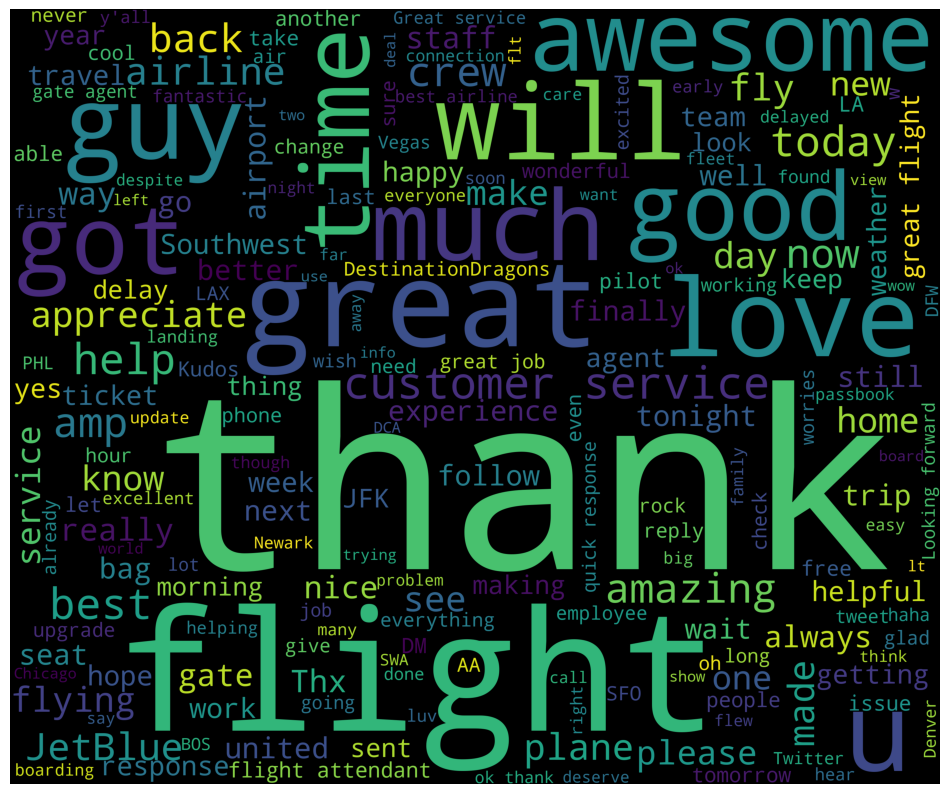

In [40]:
new_df = data[data["Airline_Sentiment"] == "positive"]
words = " ".join(new_df["Text"])
cleaned_word = " ".join([word for word in words.split() if "http" not in word and not word.startswith("@") and word != "RT"])
wordcloud = WordCloud(stopwords = STOPWORDS,
                     background_color = "black", width = 3000, height = 2500).generate(cleaned_word)
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Wordcloud for Negative Reasons

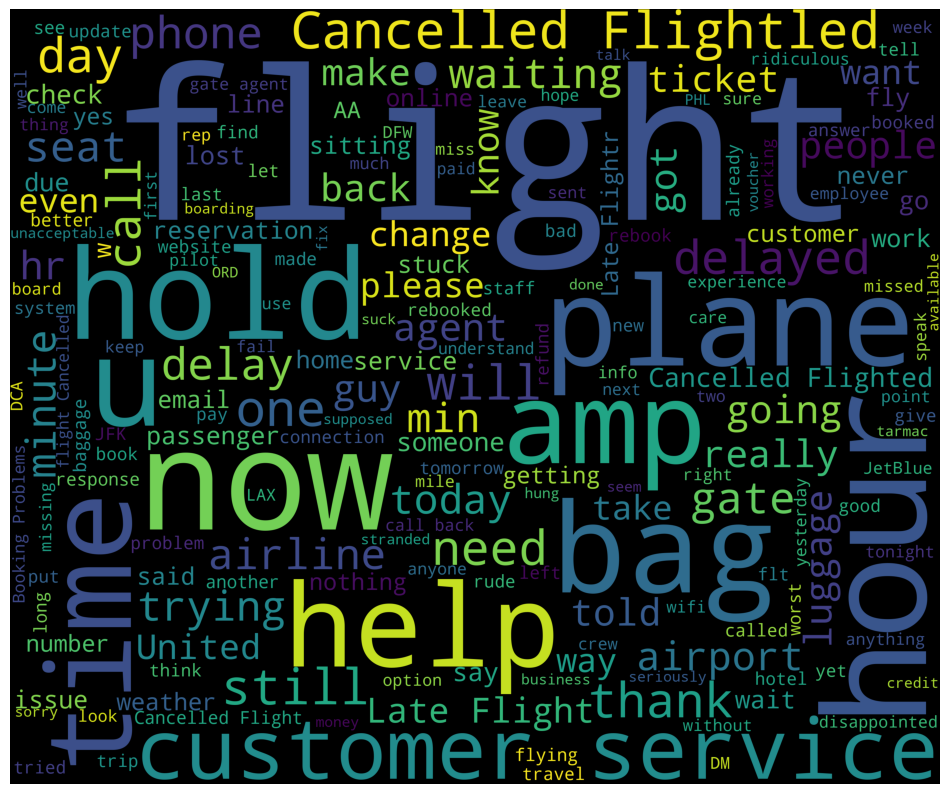

In [41]:
new_df = data[data["Airline_Sentiment"] == "negative"]
words = " ".join(new_df["Text"])
cleaned_word = " ".join([word for word in words.split() if "http" not in word and not word.startswith("@") and word != "RT"])
wordcloud = WordCloud(stopwords = STOPWORDS,
                     background_color = "black", width = 3000, height = 2500).generate(cleaned_word)
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [42]:
data.drop(data.loc[data["Airline_Sentiment"] == "neutral"].index, inplace = True)

## Data Scaling

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(data["Airline_Sentiment"])
data["Airline_Sentiment_Encoded"] = le.transform(data["Airline_Sentiment"])
data.head()

,Airline_Sentiment,Text,Airline_Sentiment_Encoded
1,positive,@VirginAmerica plus you've added commercials t...,1
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0
5,negative,@VirginAmerica seriously would pay $30 a fligh...,0
6,positive,"@VirginAmerica yes, nearly every time I fly VX...",1


In [44]:
def tweet_to_words(tweet):
    letters_only = re.sub("[^a-zA-Z]", " ", tweet)
    words = letters_only.lower().split()
    stops = set(stopwords.words("english"))
    meaningful_words = [w for w in words if not w in stops]
    return(" ".join( meaningful_words ))

In [45]:
nltk.download("stopwords")
data["clean_tweet"] = data["Text"].apply(lambda x: tweet_to_words(x))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11510 entries, 1 to 14638
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Airline_Sentiment          11510 non-null  object
 1   Text                       11510 non-null  object
 2   Airline_Sentiment_Encoded  11510 non-null  int64 
 3   clean_tweet                11510 non-null  object
dtypes: int64(1), object(3)
memory usage: 449.6+ KB


In [47]:
X = data["clean_tweet"]
y = data["Airline_Sentiment"]

In [48]:
print(X.shape, y.shape)

(11510,) (11510,)


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [50]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8632,) (2878,) (8632,) (2878,)


In [51]:
vect = CountVectorizer()
vect.fit(X_train)

CountVectorizer()

In [52]:
X_train_dtm = vect.transform(X_train)
X_test_dtm = vect.transform(X_test)

## Tuning

In [53]:
vect_tunned = CountVectorizer(stop_words = "english", ngram_range = (1, 2), min_df = 0.1, max_df = 0.7, max_features = 100)
vect_tunned

CountVectorizer(max_df=0.7, max_features=100, min_df=0.1, ngram_range=(1, 2),
                stop_words='english')

## Model Building

In [54]:
from sklearn.svm import SVC
model = SVC(kernel = "linear", random_state = 10)
model.fit(X_train_dtm, y_train)
pred = model.predict(X_test_dtm)

In [55]:
print("Accuracy Score: ", accuracy_score(y_test, pred) * 100)

Accuracy Score:  90.7574704656011


In [56]:
print("Confusion Matrix\n\n", confusion_matrix(y_test, pred))

Confusion Matrix

 [[2179  122]
 [ 144  433]]


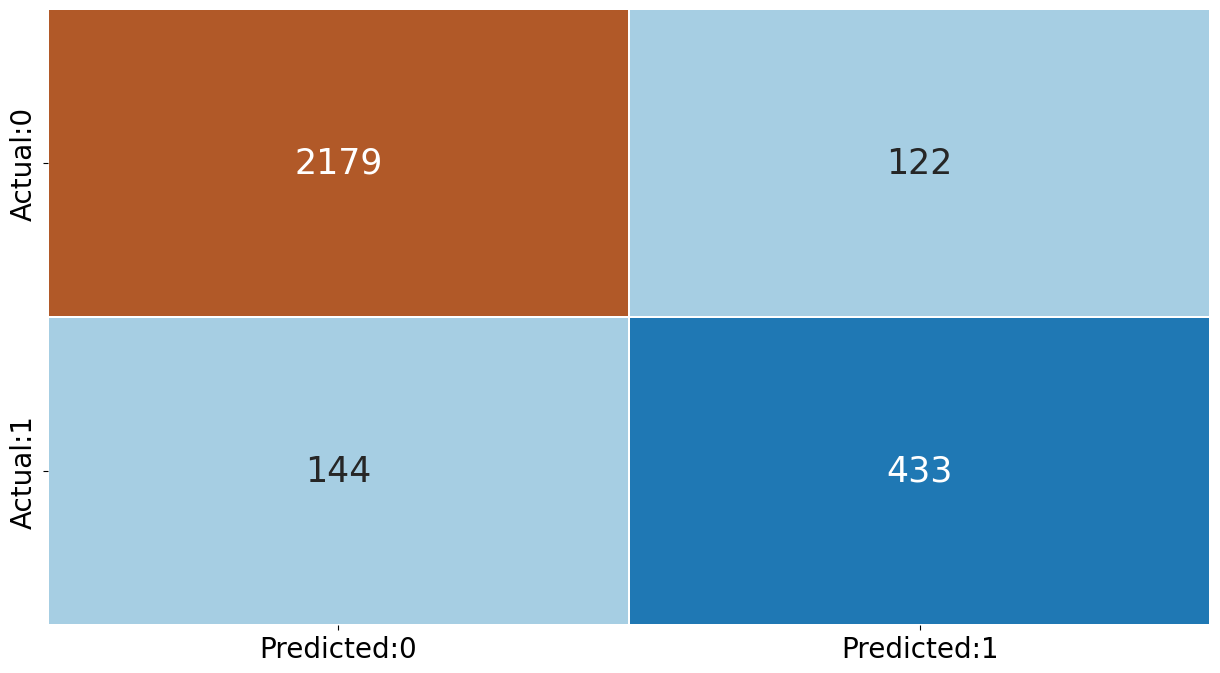

In [57]:
#defining the size of the canvas
plt.rcParams['figure.figsize'] = [15,8]
#confusion matrix to DataFrame
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test, pred),columns = ['Predicted:0','Predicted:1',], index = ['Actual:0','Actual:1',])
#plotting the confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Paired', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [58]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    negative       0.94      0.95      0.94      2301
    positive       0.78      0.75      0.77       577

    accuracy                           0.91      2878
   macro avg       0.86      0.85      0.85      2878
weighted avg       0.91      0.91      0.91      2878



## Conclusions

* **As we you can see above we have plotted the confusion matrix for predicted sentiments and actual sentiments (negative and positive)**

* **SVM Classifier gives us the best accuracy score i.e 91% precision scores according to the classification report**

* **The confusion matrix shows the TP,TN,FP,FN for sentiments(negative, positive)**


# Thank you!